In [1]:
from cs103 import *
# Recall, we called help(function_name) to get help about a function.
# Can also call help with a 'library' (in quotes) to get info about it:
help('cs103')



Help on package cs103:

NAME
    cs103

PACKAGE CONTENTS
    custom (package)
    image (package)
    iofunc (package)
    parsing (package)
    submit (package)
    testing (package)
    typecheck (package)

CLASSES
    builtins.object
        cs103.image.image.Image
    
    class Image(builtins.object)
     |  Image(width, height, mode, color)
     |  
     |  An Image. Please see functions such as rectangle, square, circle, above,
     |  beside, etc. to learn how to construct images. Images displayed as the
     |  value of a Jupyter cell will draw themselves.
     |  
     |  Methods defined here:
     |  
     |  __eq__(self, other)
     |      Return self==value.
     |  
     |  __init__(self, width, height, mode, color)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  __repr__(self)
     |      Return repr(self).
     |  
     |  check(self, canvas, x, y, z)
     |  
     |  draw(self, canvas, x, y)
     |  
     |  -----------------

# CPSC 103 - Systematic Program Design
# Module 03 Day 1
Ian Mitchell, with thanks to Rik Blok and Giulia Toti

---

# Reminders
- this Wed-Fri: Module 3 Tutorial Attendance
- Wed: Module 2 (HtDF): Code Review
- Wed: Module 2 (HtDF): Tutorial Submission
- Mon: Module 4: Pre-Lecture Assignment
- Mon: Module 3 (HtDD): Worksheet

See your Canvas calendar (https://canvas.ubc.ca/calendar) for details.

---

# Your progress so far

#### Module 1: 
- You learned the basics of Python syntax and how to use Jupyter notebooks to run Python code
- You gained an understanding of variables and functions

#### Module 2:
- You learned the How to Design Functions (HtDF) recipe, which allows you to write clear and well-structured functions

---

# Module learning goals

By the end of this module, you will be able to:

- Use the How to Design Data (HtDD) recipe to design data definitions. 
- Identify problem domain information that should be represented as simple atomic data, intervals, enumerations, and optionals. 
- Use the Data Driven Templates recipe to generate templates for functions operating on data of a user-defined type. 
- Use the How to Design Functions (HtDF) recipe to design functions operating on data of a user-defined type. 

<div class="alert alert-info">
            
## ℹ️ Templates
    
- If you felt that we did not properly motivate or explain step 3 "write the template" of the HtDF recipe during module 2, you are absolutely right!
- The structure of the template for a function depends on the type of the input data; in other words, the type of the function's argument.  In module 2 we only used very simple types of data -- such as `int`, `float`, `bool`, or `str` -- and they all had the simple template `return ...(x)`.
- In this module we will introduce several additional types of data and learn how to construct a template for each one.
- Modules 4 and 5 will each then introduce a more complicated type of data and the corresponding templates.

</div>

---

# Modeling information

- We need to connect the data from our program with information from our problem (and vice versa)
- The HtDD recipe helps us to design and document a represention of the information of the problem as data in the program, and an interpretation of the data in the program as information in the problem.
- Then the HtDF recipe helps us design function(s) which can solve the problem using the data.

<a title="How to Design Programs, Second Edition" href="https://htdp.org/2022-8-7/Book/part_one.html#%28counter._%28figure._fig~3adata-info%29%29">

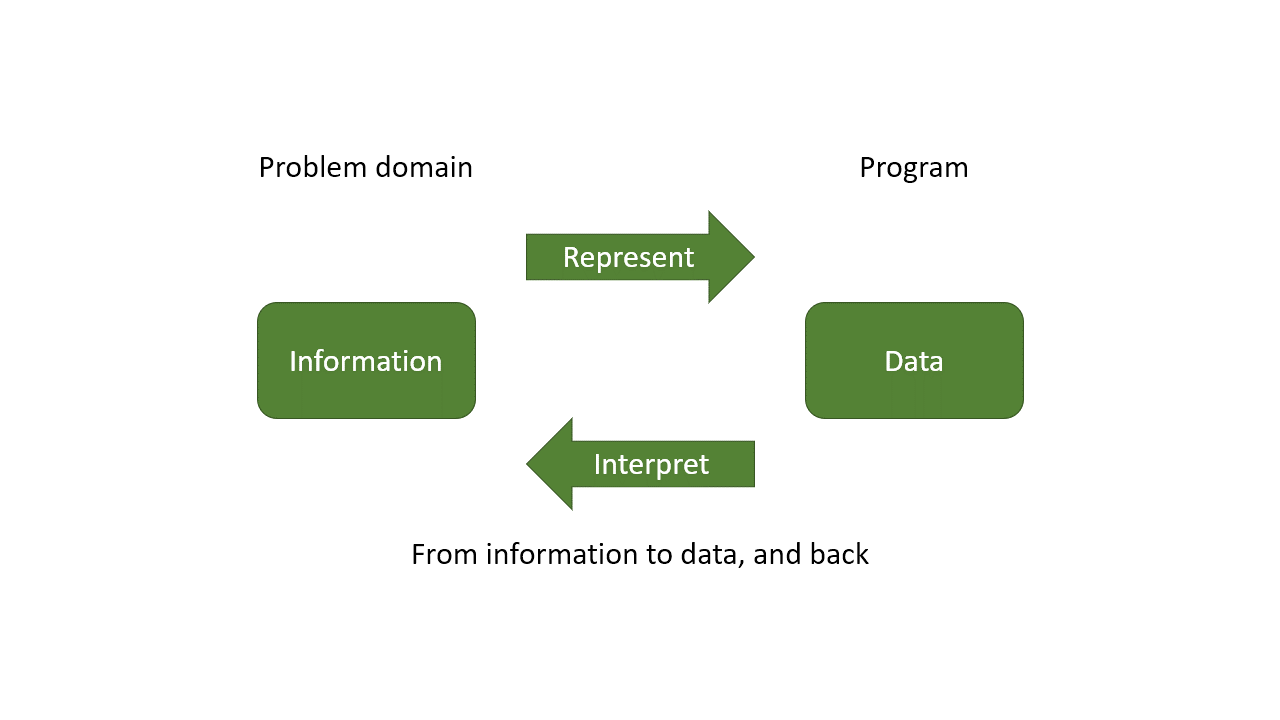
</a>

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Information vs. data
Our program is storing the following data in a variable: `100`.  How could this data be interpreted as information in a relevant problem domain?

<!-- formatting: add two spaces at end of line to force linebreak -->

A. 100 students in a course  
B. The width of a 100×100 pixel image  
C. $100 in a bank account  
D. All of the above  
E. None of the above  

---

# Information vs. data

- The problem domain guides the *representation* of information as data, and the *interpretation* of data as information.
- Data without domain knowledge is meaningless!
- The programmer's job is to bridge the divide so the user can work with *information* and the program can work with *data*.

---

# Primitive vs. non-primitive data

#### Primitive Python data
Data provided by Python, without any meaning attached. They are also called *atomic non-distinct*. 

Examples: `int`, `float`, `str`, `bool`

#### Glossary
- *Primitive*: Built into Python
- *Atomic*: Can't be broken down into smaller pieces
- *Distinct*: A specific value (e.g., `False`, `-3`, or `'hi'`)  
- *Non-distinct*: Can take on more than one value (e.g., `bool`)


#### Non-primitive data
Data we create using a combination of primitive data. 

Examples: `age`, `height`, `name`, `grade`, ...

**Non-primitive data imparts some information from the problem into Python data, enriching it with some meaning.**

---

# How to Design Data recipe (HtDD)

The HtDD recipe consists of the following steps: 
1. **<u>D</u>efinition:** a line that tells Python the name of the new type (it is equivalent to the function signature from HtDF). 
2. **<u>I</u>nterpretation:** a comment that describes what the new data type represents (it is equivalent to the purpose comment from HtDF). 
3. **<u>E</u>xamples:** show how to form data of this type, usually giving special cases. 
4. **<u>T</u>emplate:** a one-parameter function that shows how a function acting on this type of data should operate. 

<div class="alert alert-info">
    
## ℹ️ Q: How to Design Data?  A: DIET!

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">DIET stands for...</summary>
    
1. **D**efinition
2. **I**nterpretation
3. **E**xamples
4. **T**emplate

Again, you don't really need to memorize it:
- Just keep the [HtDD page](https://canvas.ubc.ca/courses/123409/pages/how-to-design-data) (and the [Data Driven Templates page](https://canvas.ubc.ca/courses/123409/pages/data-driven-templates)) on Canvas open when you are designing data on a computer.
- We will provide the [Exam Reference Sheet](https://canvas.ubc.ca/courses/123409/files/27906280) during exams.
    
</details>
    
</div>


<div class="alert alert-warning">
    
## ⚠️ Don't confuse the HtDD recipe with the HtDF recipe!

- HtD**D** and HtD**F** recipes share some similarities; for example, they sound very similar when the acronyms are said fast.
- But they serve different purposes:
    - HtD**F** (SETIT): Given some data, how do you design a **function** to work with it?
    - HtD**D** (DIET): Given some information to store, how do you **represent** it as data?  Given some stored data, how do you **interpret** it as information?
- Generally speaking, you cannot start on HtDF until you (or somebody else) has completed the corresponding HtDD.
- You'll need to keep them straight and use them correctly.
    
</div>

---

# HtDD naming conventions

1. **<u>D</u>efinition** names use `UpperCamelCase` [[Wikipedia](https://en.wikipedia.org/wiki/Camel_case)].  E.g.,
```python
MovieTitle = ...
```
2. **<u>I</u>nterpretation** starts with `# interp.`.  E.g.,
```python
# interp. Stores the name of a movie.
```
3. **<u>E</u>xample** names are in `ALL_CAPS` [[Wikipedia](https://en.wikipedia.org/wiki/All_caps)].  They often use an abbreviation or acronym for the data type name, followed by a number or another meaningful mnemonic.  E.g.,
```python
MT1 = ...
MT2 = ...
MT_FAVOURITE = ...
```
4. **<u>T</u>emplate** function names start with `fn_for_`, then the type name in `snake_case` [[Wikipedia](https://en.wikipedia.org/wiki/Snake_case)].  Parameter names are in lowercase (or if necessary `snake_case`), often using an abbreviation or acronym for the data type name.  E.g.,
```python
def fn_for_movie_title(mt: MovieTitle) -> ...:
```

## Aside: Naming style for variables and functions

Reminder that in CPSC 103 we use `snake_case` for all variable, function, and parameter names.
See the course [Style Guide](https://canvas.ubc.ca/courses/123409/pages/style-guide).

<div class="alert alert-success">
            
## ✅ Benefits of following a naming convention:
    
- Provides additional information to the human reader about the use of an identifier.
- Reduces ambiguity for the human reader.
- Promotes code sharing and re-use by a human reader.
    
**Remember:** The primary target audience for the code you write is a human reader, not Python / Jupyter.

You will be expected to follow our naming conventions throughout CPSC 103.

</div>
            
---

# Data types

Our data definitions will be composed from data types provided by Python (e.g., `int`, `float`, `str`, `bool`).  

There are several types of data, and there is *no firm rule* for when to use a particular one... it should just fit your problem.  For example, depending on the problem, we might represent a temperature as an `int` or a `float` or something else.  Through practice, we will learn what factors to consider when choosing an appropriate data type.

#### Now (Module 3):
- Simple atomic data
- Interval
- Enumeration
- Optional

#### Later:
- Compound data (Module 4)
- Arbitrary-sized (Module 5)

---

# Simple atomic data

When the information to be represented is itself atomic in form. Usually these are just the primitive data with a better name and description. 

```python
Temperature = float                               # 1. Definition
# interp. the air temperature in degrees Celsius  # 2. Interpretation

T1 = 0.0                                          # 3. Examples
T2 = -24.5 
 
@typecheck 
# template based on Atomic Non-Distinct           # 4. Template
def fn_for_temperature(t: Temperature) -> ...: 
	return ...(t) 
```

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Simple atomic
Which of the following are examples of information that would be best represented with **simple atomic** data types?  Select **ALL** that apply. [iClicker: Set to "Multiple Answer" type.]

<!-- formatting: add two spaces at end of line to force linebreak -->

A. The temperature of liquid water at standard atmospheric pressure  
B. Allergies that a patient has  
C. The name of a book  
D. A blood type, such as A, B, AB, or O  
E. A phone number  

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Answers (For later.  Don't peek if you want to learn 🙂)</summary>
    
A. **✗** No because, under these conditions, water is liquid in a very specific range, between 0°C and 100°C.  
B. **✗** No because a patient might not have any allergies.  
C. **✓ Yes, a book's title might be almost any string.**  
D. **✗** No because humans have four distinct blood types.  
E. **✓ Yes because phone numbers can vary in number of digits and may contain special codes, such as `*` and `#`.  When presented they may also contain `-`, `+`, `.`, or other symbols.**  

</details>

---

# Interval

When the information to be represented is numbers within a certain, meaningful range. 

```python
Time = int # in range[0, 86400)            # 1. Definition
# interp. seconds since midnight           # 2. Interpretation

T_MIDNIGHT = 0                             # 3. Examples
T_ONE_AM = 3600 
T_NOON = 43200 
T_END_OF_DAY = 86399

@typecheck 
# Template based on Atomic Non-Distinct    # 4. Template
def fn_for_time(t: Time) -> ...: 
	return ...(t)
```

- Range is just a comment for the programmer, not enforced by Python
- Square and round bracket notation borrowed from math: `[` or `]` means the endpoint is *included* and `(` or `)` means it is *excluded*
- Use `...` to indicate no limit, e.g., `WaterDepth = float # in range (...,0]`

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Interval
Which of the following are examples of information that would be best represented with **interval** data types?  Select **ALL** that apply.

<!-- formatting: add two spaces at end of line to force linebreak -->

A. The name of someone's sibling  
B. A percentage score on a test  
C. A temperature in Celsius  
D. Whether a user is logged in  
E. The wavelength of a visible photon  

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Answers (For later.  Don't peek if you want to learn 🙂)</summary>
    
A. **✗** No because (most?) names aren't numbers.  
B. **✓ Yes, a number between 0 and 100 (inclusive).**  
C. **✗** No.  There is technically a lower limit ([absolute zero](https://en.wikipedia.org/wiki/Absolute_zero)) but it's not clear that it's meaningful here.  
D. **✗** No, this is either `True` or `False` so better as a simple atomic (`bool`).  
E. **✓ Yes, our eyes can detect light between 400nm and 700nm.**  

</details>

---

# Enumeration

When the information to be represented consists of a fixed number of distinct values. 

```python
from enum import Enum          # need to import Enum data type from library

Rock = Enum('Rock', ['ig', 'me', 'se']) 
# interp. a rock is either igneous ('ig'), metamorphic ('me'), or sedimentary ('se')

# examples are redundant for enumerations

@typecheck 
# Template based on Enumeration (3 cases) 
def fn_for_rock(r: Rock) -> ...: 
	if r == Rock.ig: 
		return ... 
	elif r == Rock.me: 
		return ... 
	elif r == Rock.se: 
		return ... 
```

- Python treats the cases in the `Enum` definition as allowed distinct values, and uses the "dot notation" instead of strings to represent.
- Advantage over strings: Restricts allowed values
```python
my_rock = Rock.ig          # distinct Enum values allowed (good!)
my_rock = "kryptonite"     # any string allowed by Python (bad!)
my_rock = Rock.kryptonite  # will produce error (good!)
```
- Note that `# examples are redundant for enumerations`, so just write that at step 3.
- One branch per option in the template, all separated with `elif` (don't use `else` to catch other cases)

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Elif or else?
For the example above, which of the following **enumeration** template function bodies follow proper style?  Select **ALL** that apply.

<div style="width: 100%; display: flex; justify-content: space-between;">
    
<div style="float: left; width: 33%">

### (A)
    
```python
if r == Rock.ig: 
    return ... 
elif r == Rock.me: 
    return ... 
elif r == Rock.se: 
    return ... 
else: 
    return ... 
```
    
</div>
    
<div style="float: left; width: 33%">

### (B)
    
```python
if r == Rock.ig: 
    return ... 
elif r == Rock.me: 
    return ... 
else: 
    return ... 
```

</div>

    
<div style="float: left; width: 33%">

### (C)
    
```python
if r == Rock.ig: 
    return ... 
elif r == Rock.me: 
    return ... 
elif r == Rock.se: 
    return ... 
```

</div>

</div>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hints (For later.  Don't peek if you want to learn 🙂)</summary>
    
- Besides `Rock.ig`, `Rock.me`, and `Rock.se`, are there any other possible values the enumeration should be able to take?
- The template should clearly demonstrate how to implement code for **all** possible values of the enumeration.  Do all of the above satisfy that criterion?

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Answer</summary>
    
A. **✗** No.  There are no other values to check so the `else` branch is redundant.  
B. **✗** No.  The template doesn't clearly demonstrate how to implement code for `Rock.se`.  
C. **✓** Yes. The template clearly demonstrates how to implement all possible cases (and only them).  

</details>

</details>

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Enumeration
Which of the following are examples of information that would be best represented with **enumeration** data types?  Select **ALL** that apply.

<!-- formatting: add two spaces at end of line to force linebreak -->

A. An individual's emergency contact  
B. The day of the week  
C. How much money there is in a bank account  
D. A music genre played by a streaming channel  
E. The number of pages in a book  

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Answers (For later.  Don't peek if you want to learn 🙂)</summary>
    
A. **✗** No, should be something like a person's name or phone number.  
B. **✓ Yes, there are only seven distinct values.**  
C. **✗** No, no clear bounds on the amount.  
D. **✓ Maybe.  Depends on whether the genres are unchanging and (easily) counted.**  
E. **✗** No, the number of pages depends on the book.  

</details>

---

# Optional

When the information to be represented is well-represented by another form of data (often simple atomic or interval) except for one (and only one) special case. 

```python
from typing import Optional  # need to import Optional data type from library

Countdown = Optional[int] # in range[0, 10] 
# interp. a countdown that has not started yet (None), 
# or is counting down from 10 to 0 

C0 = None 
C1 = 10 
C2 = 7 
C3 = 0 

@typecheck 
# Template based on Optional 
def fn_for_countdown(c: Countdown) -> ...: 
	if c == None: 
		return ... 
    else: 
        return ...(c) 
```

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Optional
Which of the following are examples of information that would be best represented with **optional** data types?  Select **ALL** that apply.

<!-- formatting: add two spaces at end of line to force linebreak -->

A. A person's job title  
B. A season of the year  
C. A user's middle name  
D. The age of a voter in a BC election  
E. A description of the weather  

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Answers (For later.  Don't peek if you want to learn 🙂)</summary>
    
A. **✓ Yes, they might not have a job.**  
B. **✗** No, there are four distinct seasons.  
C. **✓ Yes, not everyone has a middle name.**  
D. **✗** No, all voters have an age.  
E. **✗** No, the description may vary but there is always some description.  

</details>

---

# Templates

### Data template
This is a one-parameter function that shows how a function that takes this data as input should operate. 

### How to use with function template
When writing a function with the HtDF recipe, in Step 3 "Template", use the template from the data definition instead of writing your own:
- Comment out the body of the stub, as usual
- Then **copy the body of the template from the data definition to the function**
    - If there is no data definition, just copy all parameters (as we did in HtDF for atomic non-distinct data) 

References: See the [How to Design Data](https://canvas.ubc.ca/courses/123409/pages/how-to-design-data) and [Data Driven Templates](https://canvas.ubc.ca/courses/123409/pages/data-driven-templates) pages on Canvas

---

# Practice: "Standing" problem

**Problem:** Design a function that takes a student's standing ([SD](https://vancouver.calendar.ubc.ca/campus-wide-policies-and-regulations/grading-practices/standings#231) for "standing deferred", [EX](https://vancouver.calendar.ubc.ca/campus-wide-policies-and-regulations/grading-practices/standings#225) for "exempted", and [W](https://vancouver.calendar.ubc.ca/campus-wide-policies-and-regulations/grading-practices/standings#233) for "withdrew") and determines whether the student is still working on the course where they earned that standing.

To do this, we first design a data definition for a standing.

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Data definition
How do we represent "Standing" in a way that is understandable and meaningful in Python?

<!-- formatting: add two spaces at end of line to force linebreak -->

A. Simple atomic  
B. Interval  
C. Enumeration  
D. Optional  
E. Something else

---

# "Standing" solution

**Problem:** (from above) Design a function that takes a student's standing ([SD](https://vancouver.calendar.ubc.ca/campus-wide-policies-and-regulations/grading-practices/standings#231) for "standing deferred", [EX](https://vancouver.calendar.ubc.ca/campus-wide-policies-and-regulations/grading-practices/standings#225) for "exempted", and [W](https://vancouver.calendar.ubc.ca/campus-wide-policies-and-regulations/grading-practices/standings#233) for "withdrew") and determines whether the student is still working on the course where they earned that standing.

<div class="alert alert-info">

## ℹ️ Importing from libraries

You don't need to memorize the library for the data definition: Just look it up on the [exam reference sheet](https://canvas.ubc.ca/courses/123409/files/27906280/download?download_frd=1).  However, to make things easier right now:
- Simple atomic - doesn't require a library
- Interval - doesn't require a library
- Enumeration - `from enum import Enum`
- Optional - `from typing import Optional`
        
</div>

In [ ]:
from enum import Enum
Standing = Enum('Standing'['SD','EX','W'])
#interp. The standing of a student in a course at UBC.
#SD means standing deferred, EX means exempted, W means withdrawn
#examples are redundant in an enumeration

@typecheck
def fn_for_standing(s) -> ...:
    '''purpose.'''
    if s == Standing.SD:
        return ... 
    elif s == Standing.EX:
        return ...
    elif s==Standing.W:
        return ...

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
        
```python
from enum import Enum

Standing = Enum('Standing', ['SD', 'EX', 'W'])
# interpr. the standing of a student in a course,
# which is one of SD for "standing deferred", 
# EX for "exempted", or W for "withdrew".

# examples are redundant for enumeration

@typecheck
# Template based on Enumeration (3 cases)
def fn_for_standing(s: Standing) -> ...:
    if s == Standing.SD:
        return ...
    elif s == Standing.EX:
        return ...
    elif s == Standing.W:
        return ...
    
```
    
</details>

---

# Using with our HtD<u>F</u> recipe

Now we can design – using the HtD<u>F</u> recipe – the function that takes a standing and "determines whether the student is still working on the course where they earned that standing."

Notice that the "Template" step in the HtDF recipe changes from **writing** a template to instead **copying** a template.

In [ ]:
@typecheck
def still_working(s: Standing) -> ...:
    """
    ...
    """
    return 0  # INCORRECT stub


start_testing()

expect(still_working(...), ...)

summary()



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
        
```python
@typecheck
def still_working(s: Standing) -> bool:
    """
    Takes a student's standing (SD for "standing deferred", 
    EX for "exempted", or W for "withdrew") and returns 
    True if the student is still working on the course 
    where they earned that standing, otherwise False.
    """
    # return True # stub
    # template from Standing
    if s == Standing.SD:
        return True
    elif s == Standing.EX:
        return False
    elif s == Standing.W:
        return False
    
start_testing()

expect(still_working(Standing.SD), True)
expect(still_working(Standing.EX), False)
expect(still_working(Standing.W), False)

summary()
```
    
</details>

---

# Re-using our "Standing" data definition
A single data definition is generally used for many different functions in a program, so we will design a second function that uses `Standing` here.

<div class="alert alert-info">

## ℹ️ Ratio of data definitions to functions
In CPSC 103 we often only have time to design one example function for a given data definition in a class, tutorial, assignment, or exam; however, you should not interpret that 1:1 ratio as representative of most real problem solutions.  In most real problems, we will design multiple functions to perform multiple operations on a single given data type.
        
</div>

**Problem:** Design a function that takes a standing (as above) and returns an English explanation of what the standing means.

We already have the data definition, which guides our function design. Indeed, the designed function is very similar to the previous one. Finding where it's *different* may tell you a lot about why examples and templates are useful!

In [ ]:
@typecheck
def describe_standing(s: Standing) -> ...:
    """
    returns an English description of a Standing s
    """
    return 0  # INCORRECT stub


start_testing()

# We've gone ahead and filled in the test cases 
# already to help move us along a bit!
# The HtDD recipe tells us we should have one 
# test for every value in the Standing enumeration! 

expect(describe_standing(Standing.SD), 
       "Standing Deferred: awaiting completion of some outstanding requirement")
expect(describe_standing(Standing.EX), 
       "Exempted: does not need to take the course even if it is normally required")
expect(describe_standing(Standing.W), 
       "Withdrew: withdrew from the course after the add/drop deadline")

summary()



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
        
```python
@typecheck
def describe_standing(s: Standing) -> str:
    """
    returns an English description of standing s
    """
    # return ""  # stub
    # template from Standing
    if s == Standing.SD:
        return "Standing Deferred: awaiting completion of some outstanding requirement"
    elif s == Standing.EX:
        return "Exempted: does not need to take the course even if it is normally required"
    elif s == Standing.W:
        return "Withdrew: withdrew from the course after the add/drop deadline"

    
start_testing()

expect(describe_standing(Standing.SD), 
       "Standing Deferred: awaiting completion of some outstanding requirement")
expect(describe_standing(Standing.EX), 
       "Exempted: does not need to take the course even if it is normally required")
expect(describe_standing(Standing.W), 
       "Withdrew: Withdrew from the course after the add/drop deadline")

summary()
```
    
</details>

Well done! Now, write a call to `describe_standing`:

In [ ]:
# Call describe_standing

